In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from sklearn.preprocessing import OneHotEncoder
import config
import matplotlib.pyplot as plt
#% matplotlib inline

In [2]:
#Connect and save to a local Postgres server
#Requires a server to be running on your machine 
protocol = 'postgresql'
username = config.username
password = config.password
host = 'localhost'
port = 5432
database_name = config.database_name
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)
con = engine.connect()

df = pd.read_sql('SELECT * FROM original',con)
ratings = pd.read_sql('SELECT * FROM y',con)
df['rating_numeric'] = ratings['Rating']
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,rating_numeric
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,2
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,3
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,3
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,3
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,3


In [3]:
df['Rating Agency Name'].unique()

array(['Egan-Jones Ratings Company', 'Fitch Ratings',
       "Standard & Poor's Ratings Services", "Moody's Investors Service",
       'DBRS'], dtype=object)

In [4]:
df.loc[df['Rating Agency Name']=='Egan-Jones Ratings Company']

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,rating_numeric
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,2
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,3
5,AA,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/18/2014,Energy,1.741958,1.317156,0.220796,83.931968,...,0.644841,5.574517,5.792278,1.767609,0.157246,9.833295,8.644788,0.230445,4.044776,1
6,AA,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,5/13/2014,Energy,1.939002,1.468909,0.256710,92.705452,...,0.597160,4.417989,6.326531,1.700068,0.151173,12.140376,7.398337,0.216233,3.998076,1
7,A,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/23/2015,Energy,1.905814,1.544791,0.197791,90.336857,...,0.726292,5.047356,10.287293,1.908484,0.081212,15.264562,6.949487,0.248203,3.665200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,BB,Briggs & Stratton Corporation,BGG,Egan-Jones Ratings Company,8/25/2015,Energy,2.373038,1.089205,0.353281,41.579082,...,0.515787,1.720715,3.360268,2.540639,0.030061,7.657673,3.336097,0.078161,8.273462,4
1950,BB,"Hanger, Inc.",HNGR,Egan-Jones Ratings Company,9/11/2014,Health Care,1.874838,0.881943,0.055488,62.840154,...,0.453919,0.637874,0.331327,2.693295,-0.000985,18.574508,1.405260,0.049026,0.000000,4
1951,BB,"Hanger, Inc.",HNGR,Egan-Jones Ratings Company,12/11/2013,Health Care,3.304861,1.688218,0.085089,64.796658,...,0.603107,1.494160,0.283185,2.191686,0.096273,10.466313,2.477439,0.082432,0.000000,4
1982,BBB,Pedevco Corp.,PED,Egan-Jones Ratings Company,12/23/2015,Energy,0.253865,0.234043,0.150390,43.380586,...,1.030844,-1.736209,0.251567,4.041830,-1.391664,-20.689438,-1.684259,-1.430529,0.474708,3


In [14]:
#Grouping Dataframe
grp_df = df.groupby(by = ['Rating Agency Name','Rating']).count().reset_index()
grp_df['Count'] = grp_df['Name']
grp_df.head()

,Rating Agency Name,Rating,Name,Symbol,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,rating_numeric,Count
0,DBRS,AA,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,DBRS,BBB,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Egan-Jones Ratings Company,A,209,209,209,209,209,209,209,209,...,209,209,209,209,209,209,209,209,209,209
3,Egan-Jones Ratings Company,AA,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
4,Egan-Jones Ratings Company,AAA,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


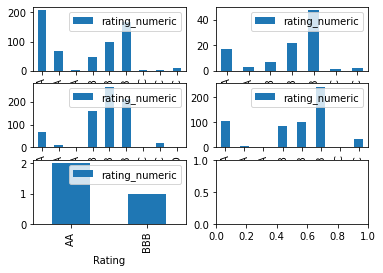

In [6]:
#Do different rating agencies give different ratings?
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2)
r=0
c=0
for idx, agency in enumerate(df['Rating Agency Name'].unique()):
    this_df = grp_df[grp_df['Rating Agency Name'] == agency]
    this_df.plot(x = 'Rating',y = 'rating_numeric', kind='bar', ax=axes[r, c])
    c = c + 1
    if c == 2:
        r = r + 1
        c = 0
    
    

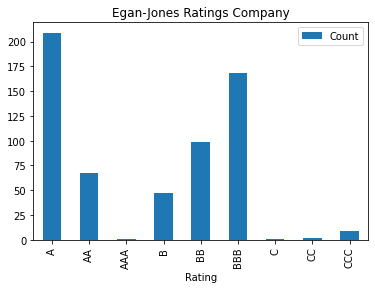

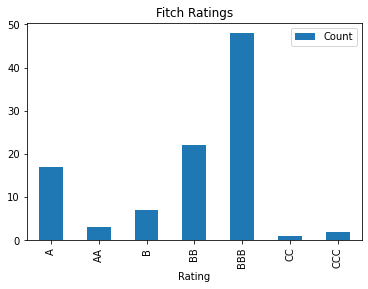

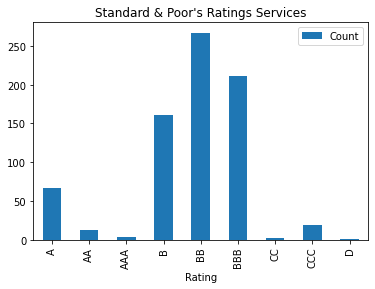

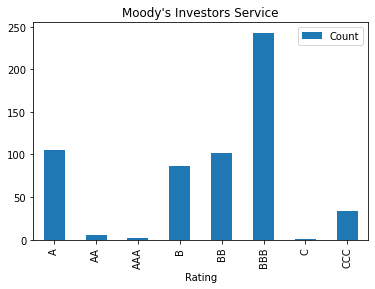

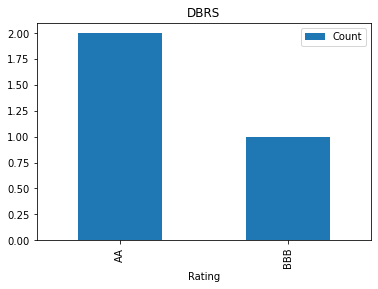

In [15]:
for agency in df['Rating Agency Name'].unique():
    grp_df[grp_df['Rating Agency Name']==agency].plot(x = 'Rating', y = 'Count', kind='bar', title = agency).figure.savefig(f"./plots/{agency}.png")